#New tasks:
- make a functoin that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU
ACUUCUAAUGA
yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j

In [1]:
%matplotlib inline
import os, sys
import subprocess as sp
import networkx as nx
import re
from eden.util import display

class FastatoGraph(object):
    def __init__(self):
        pass
    
    def SequeceWrapper(self):
        file = self._fastaFileWrapper()
        seqs = self._readFastaFile(file)
        return seqs
    
#single line Fasta sequence
    def _fastaFileWrapper(self):
        path = "/home/alshaikm/EDeN_examples/fastaFiles"
        out_path = "/home/alshaikm/EDeN_examples/fastaFiles"
        for file in os.listdir(path):
            #file_name = file
            cmd = 'echo "%s" | /usr/local/user/RNAtools/fastaFormatSingleLines.pl %s' % file > file
            #print cmd
            #file += file 
            print file
        return file

# read a fasta file separate the head and the sequence
    def _readFastaFile(self, file):
        path = "/home/alshaikm/EDeN_examples/fastaFiles"
        head_start = '>'
        head = []
        seq = []

        for file in os.listdir(path):
            #print ("file:", file)
            fi = open(os.path.join( path, file),'r')

            #seperate the head and the sequence
            for line in fi:
                lines = list(line)
                if lines[0] == head_start:
                    line = line.strip().split('\n')
                    head.append(line)
                    #print ('head', head)
                if lines[0] != head_start:
                    i = 0
                    line = line.strip().split('\n')
                    seq.append(line)
                    #print ("seq", seq)
        return seq

#generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        for j,sequence in enumerate(seq):
    #        print ('j', j)
            print ("sequence", sequence)
            sequences = list(sequence)
            for i,letter in enumerate(sequences):
                G.add_node(i, label = sequences[i])
                if i > 0:
                    G.add_edge(i-1, i, label = 'x')
            return G

#Experiment

In [2]:
#Read fasta files and separate sequences from the head of the sequence
file = fastaFileWrapper()
seqs = readFastaFile(file)
#print seqs

NameError: name 'fastaFileWrapper' is not defined

('sequence', 'GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC')


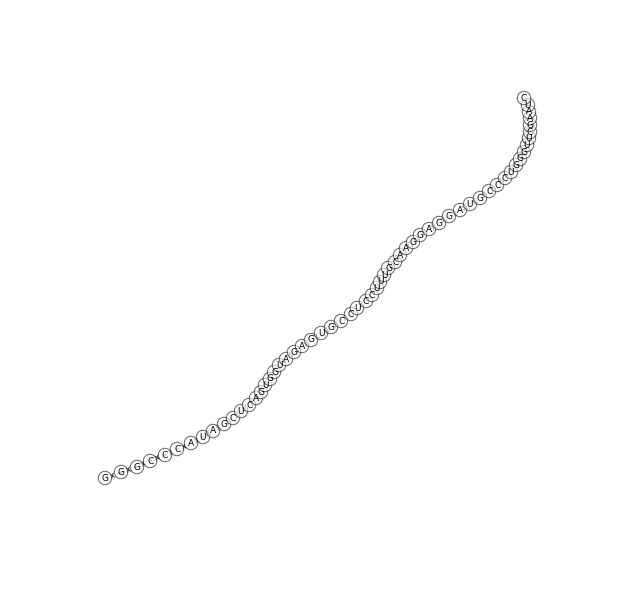

('sequence', 'CCAGUGGGUCCA')


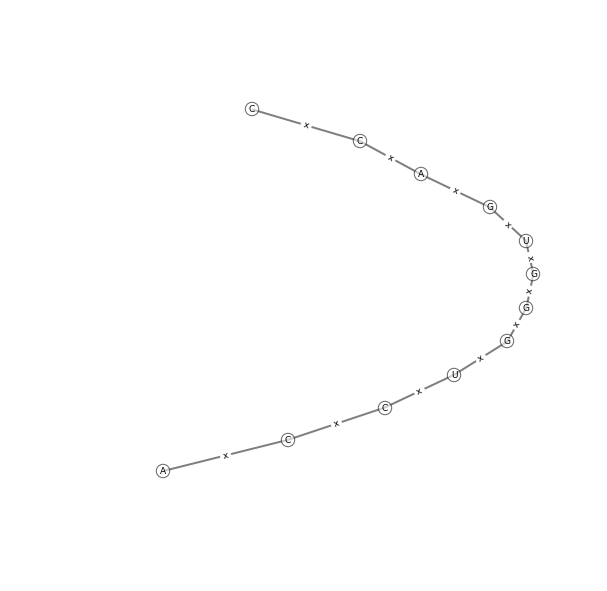

('sequence', 'CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU')


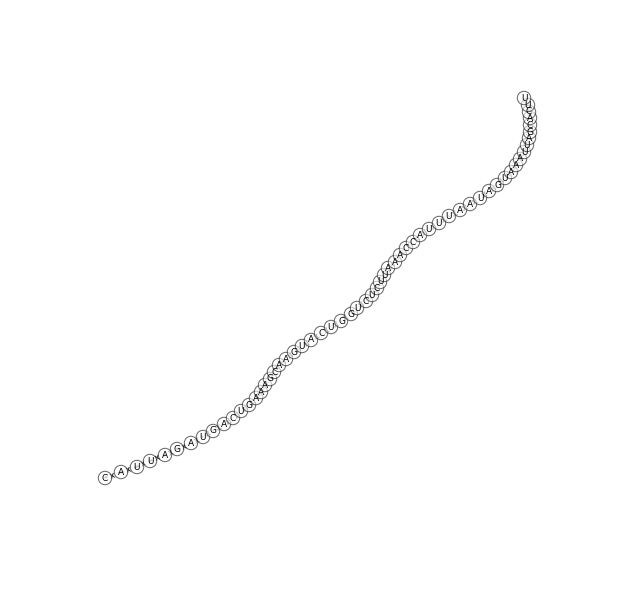

('sequence', 'ACUUCUAAUGA')


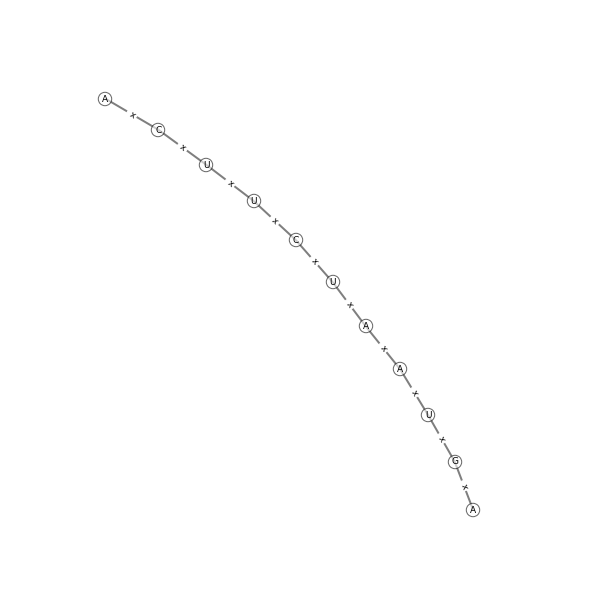

('sequence', 'GCGCCCGUAGCUCAAUUGGAUAGAGCGUUUGACUACGGAUCAAAAGGUUAGGGGUUCGAC')


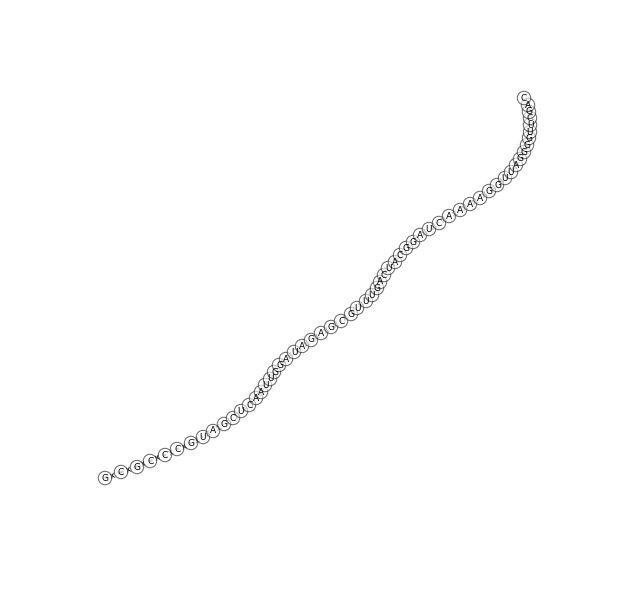

('sequence', 'UCCUCUCGGGCGCG')


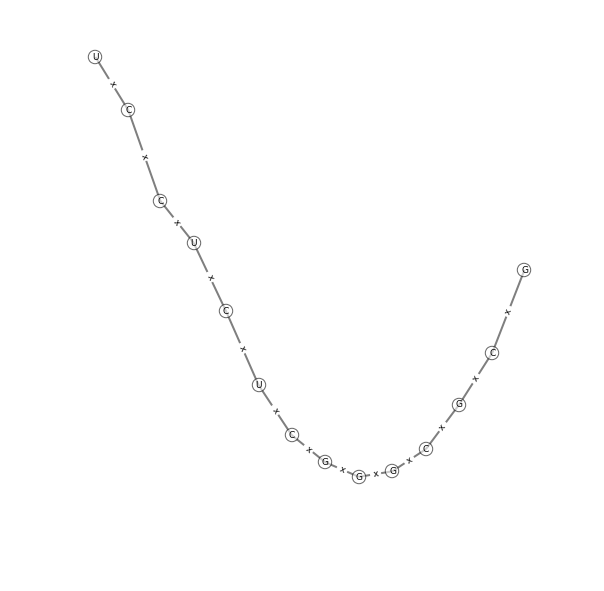

('sequence', 'GCGGAAGUAGUUCAGUGGUAGAACACCACCUUGCCAAGGUGGGGGUCGCGGGUUCGAAUC')


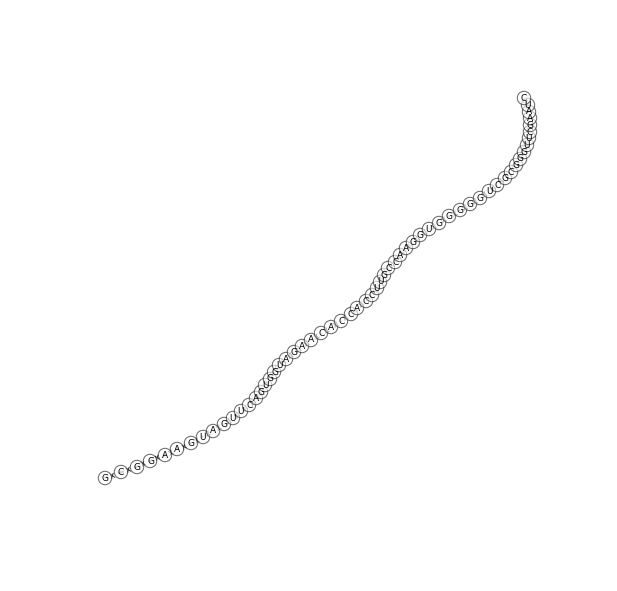

('sequence', 'CCGUCUUCCGCU')


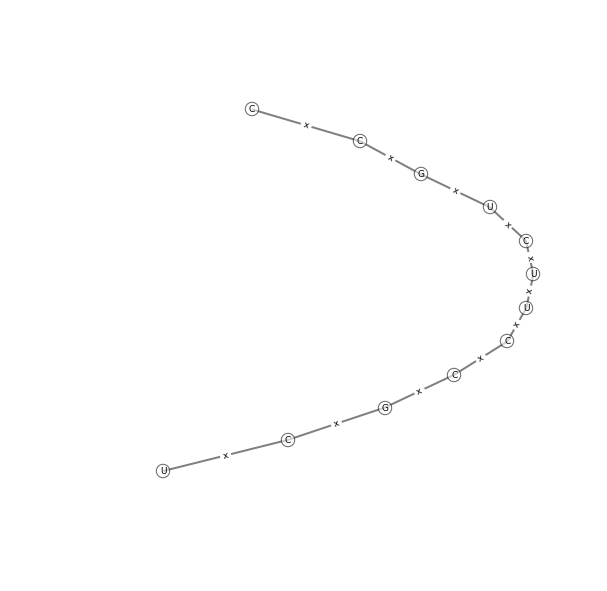

('sequence', 'GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCA')


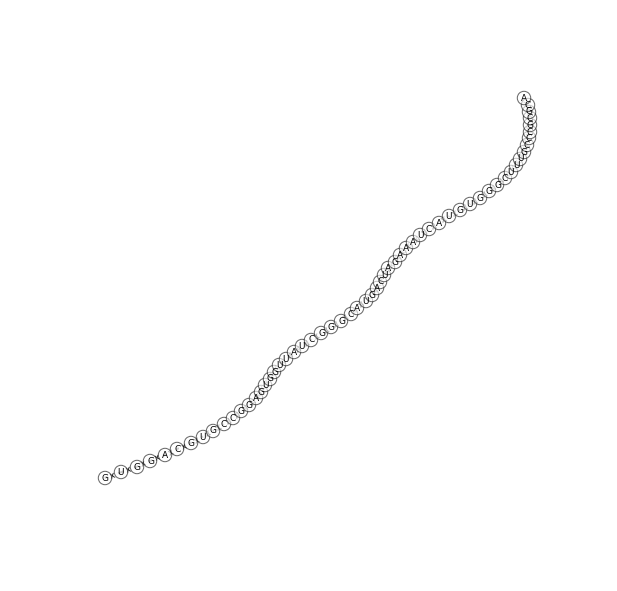

('sequence', 'GGUUCGAAUCCUGCCGUUCACG')


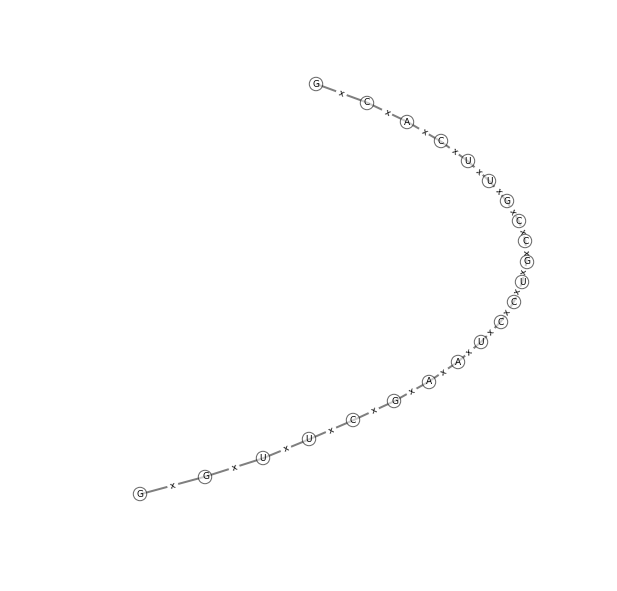

('sequence', 'GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG')


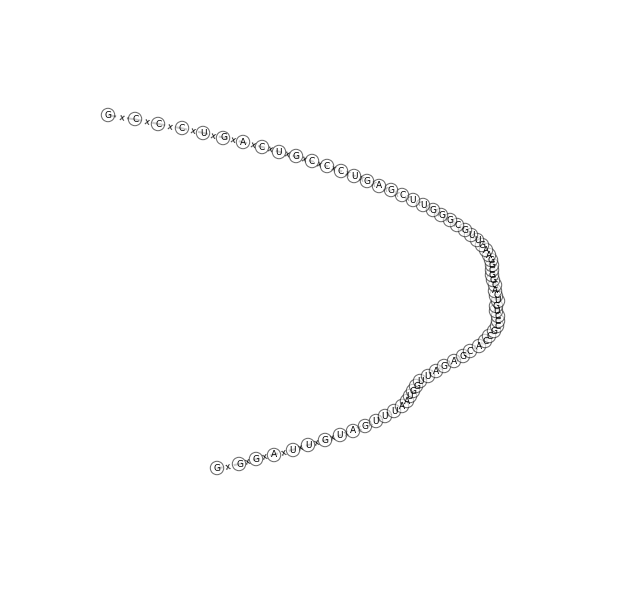

('sequence', 'GAGUUGGUAGCUCAGUUGGUAGAGCACUCGGCUUUUAACCGAUCGGUCCUGGGUUCGAAUCCCAGCCAACUCA')


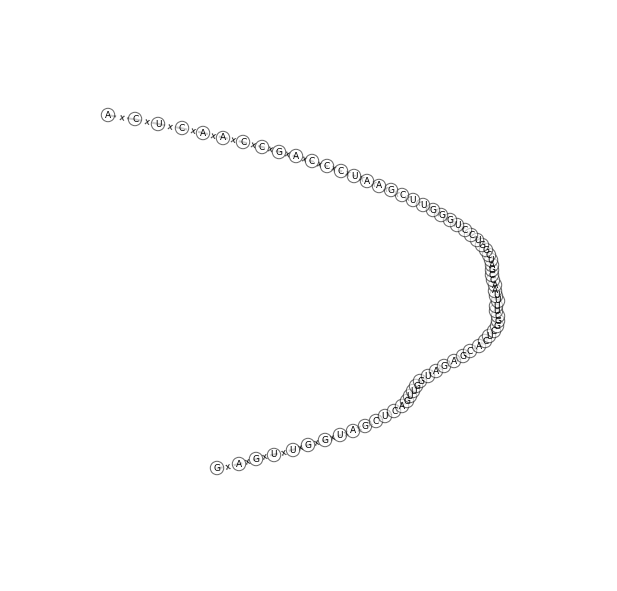

('sequence', 'GCAGGCAUGGCGGAAUUUGGUAGACGCGCAGGAUUUAGGUUCCUGUGUCUUUAUGAUGUGAGAGUUCGAGUCUCUCUGCCUGUA')


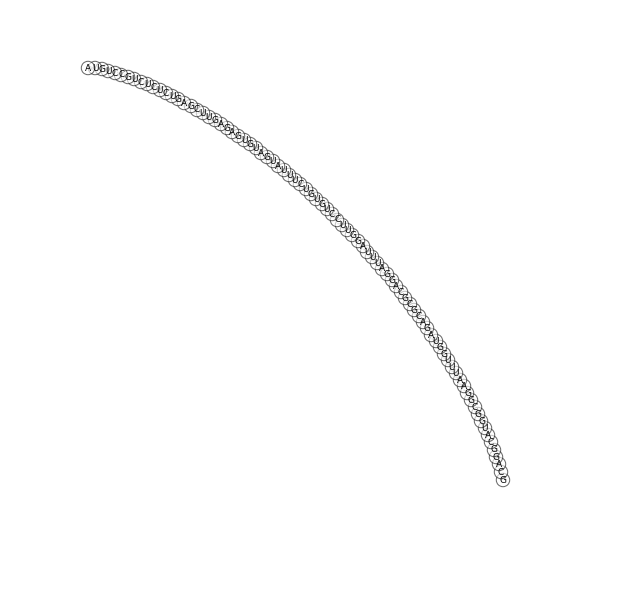

('sequence', 'GCUGGGAUAGCUCAGUUGGUAGAGCGGAGGACUGAAAAUCCUUGUGUCACCAGUUCAAAUCUGGUUCCUAGCA')


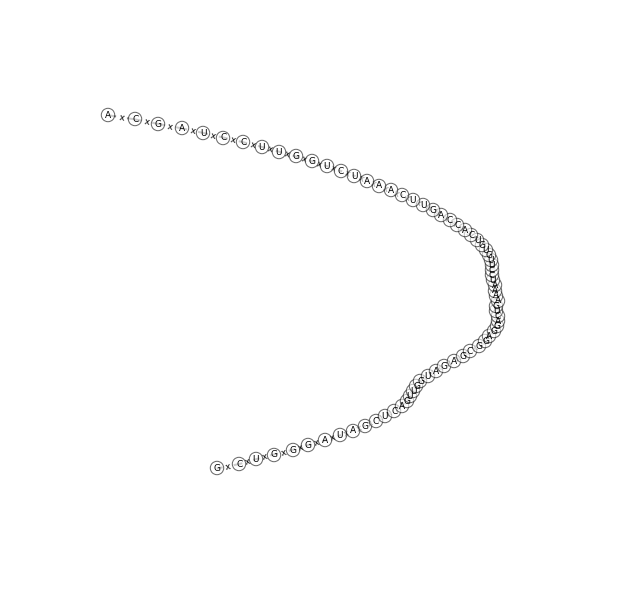

('sequence', 'CGGGAUGUAGCGCAGUUUGGUAGCGCAUUGCAUUUGGGAUGCAAGGGUCGCAGGUUCGAAUCCUGUCAUCCCGA')


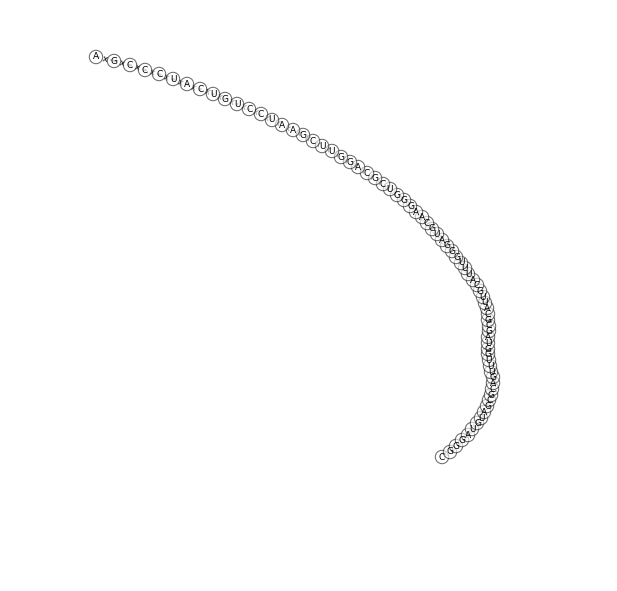

In [54]:
#generating the graph
for seq in seqs:
    G = string_to_graph(seq)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')